# <center> California Housing Price

![Green Red Pink Organic Illustration Camping Nature Instagram Post.png](<attachment:Green Red Pink Organic Illustration Camping Nature Instagram Post.png>)
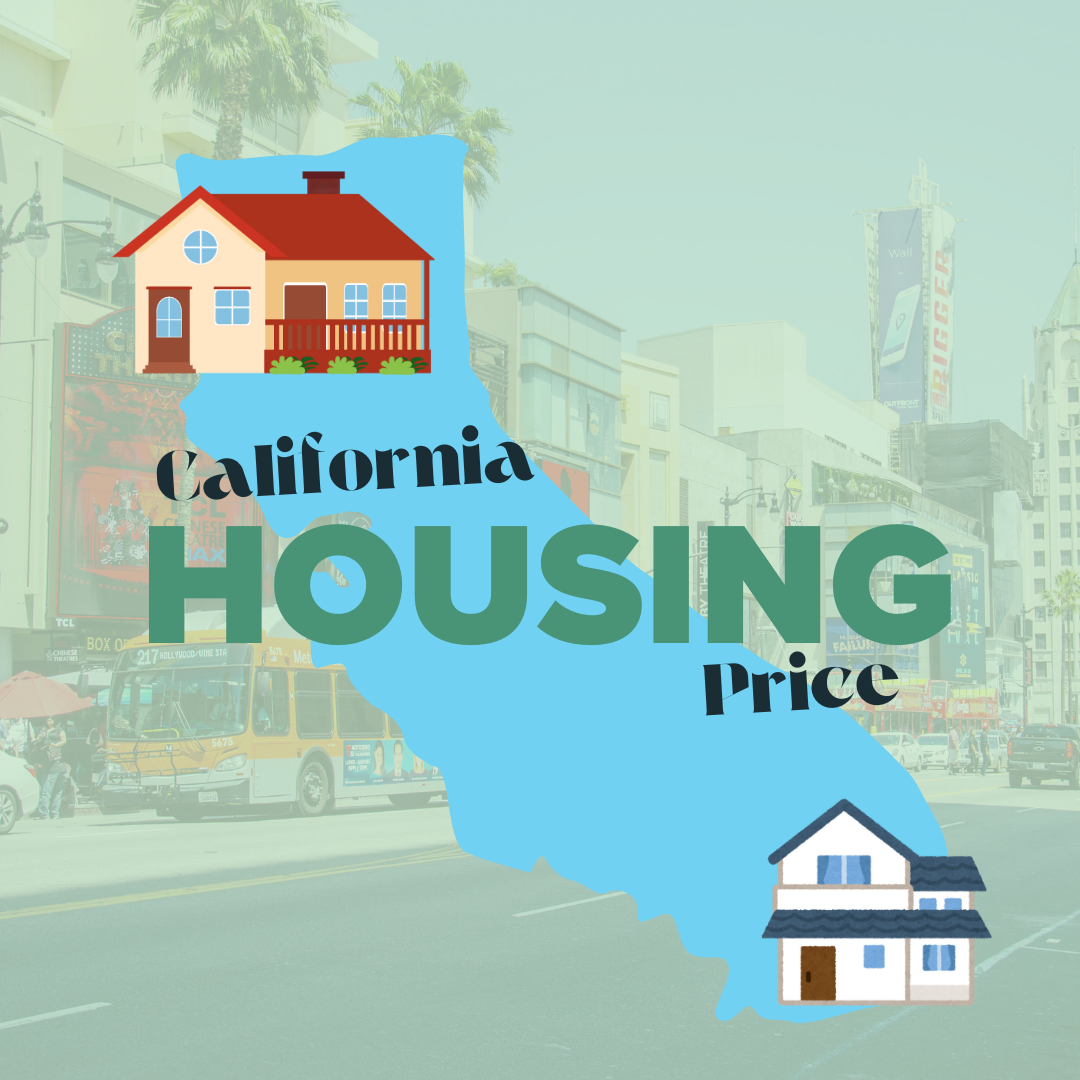

[Sumber data california Housing Price](Pace, R. Kelley, and Ronald Barry. "Sparse spatial autoregressions." Statistics & Probability Letters 
33.3 (1997): 291-297.) [https://drive.google.com/drive/folders/19YA_f36uGR86hTnZuX-Ech59s3AFzXXo]

### **Contents**

1. Business Problem Understanding
1. Data Understanding
1. Exploration Data Analysis
1. Data Preprocessing
1. Modeling
1. Conclusion
1. Recommendation

****

### <center>Business Problem Understanding

**Context**

Tempat tinggal merupakan kebutuhan pokok setiap manusia. Tetapi tidak semua orang memiliki pengetahuan tentang harga rumah yang sesuai dengan value yang di berikan. Di setiap negara cukup sulit untuk orang awam mengetahui harga rumah yang memiliki harga yang sesuai dengan value yang di berikan rumah atau perumahan tsb. Begitupun di negara california yang memiliki 50 lebih daerah yang tentunya tiap daerah memiliki harga rumah yang berbeda-beda. Fenomena ini menjadi kesempatan dan tantangan tersendiri untuk para developer perumahan untuk dapat membangun perumahan yang memiliki harga yang dapat bersaing di daerah tersebut dan tentunya memiliki value yang sesuai.

**Problem Statement**

Salah satu tantangan utama dalam analisis data real estate adalah kemampuan untuk memprediksi harga rumah secara akurat berdasarkan berbagai fitur yang ada. Hal ini dapat membantu berbagai pihak seperti agen real estate, pengembang properti, dan pembuat kebijakan dalam membuat keputusan yang lebih baik.

Menggunakan dataset dari sensus California 1990, kita akan mengembangkan model prediksi yang dapat memperkirakan nilai rumah berdasarkan fitur-fitur yang tersedia dalam dataset. Dengan `memahami faktor-faktor yang mempengaruhi harga rumah dapat memberikan wawasan yang berharga bagi para pemangku kepentingan, seperti dapat memberikan keuntungan financial yang maksimal dan rumah yang di bangun juga dapat terjual dengan cepat.`

**Goals**

Berdasarkan permasalahan tersebut, tujuan dari analisis ini adalah:

1. Mengidentifikasi faktor-faktor utama yang mempengaruhi harga rumah di California berdasarkan data sensus 1990.
1. Mengembangkan model prediksi yang dapat memperkirakan nilai rumah berdasarkan variabel-variabel yang tersedia.
1. Menyediakan wawasan yang dapat membantu dalam pengambilan keputusan terkait pembelian, penjualan, dan pembangunan properti di California.

**Analytic Approach**

Jadi, yang perlu kita lakukan adalah menganalisis data untuk dapat menemukan pola dari fitur-fitur yang ada, yang membedakan satu properti dengan yang lainnya.

Selanjutnya, kita akan membangun suatu model regresi yang akan membantu dalam memprediksi nilai rumah berdasarkan data sensus 1990.

In [163]:
#Modul Utama
import pandas as pd
import numpy as np

#Modul Visualisasi
import seaborn as sns
import matplotlib.pyplot as plt


#Modul untuk imputer
from sklearn.impute import SimpleImputer, KNNImputer


#Modul Preprocesiing
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
import category_encoders as ce


#Modul split tuning parameter, & cross validasi
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold,GridSearchCV, RandomizedSearchCV

#Modul Machine Learning
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor, NearestNeighbors
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from catboost import CatBoostRegressor
from sklearn.neural_network import MLPRegressor
from sklearn import svm
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, ExtraTreesRegressor, RandomForestRegressor
from xgboost import XGBRegressor

#modul metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

#Modul Feature Selection
from sklearn.feature_selection import SelectPercentile, SelectKBest,f_regression, f_classif

#Modul untuk Pipeline
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline


#Modul untuk handling imbalance method
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss

#Modul untuk running time
import time

pd.set_option('display.max_columns', None)

## <center>Data Understanding dan Cleaning

| Kolom             | Deskripsi                                      |
|-------------------|------------------------------------------------|
| `longitude`           | Ukuran seberapa jauh barat sebuah rumah; nilai yang lebih tinggi berarti lebih jauh ke barat |
| `latitude`         | Ukuran seberapa jauh utara sebuah rumah; nilai yang lebih tinggi berarti lebih jauh ke utara |
| `housingMedianAge`  | Usia median sebuah rumah dalam satu blok; angka yang lebih rendah berarti bangunan yang lebih baru |
| `totalRooms`       | Jumlah total kamar dalam satu blok       |
| `totalBedrooms`        | Jumlah total kamar tidur dalam satu blok |
| `population`  | Jumlah total orang yang tinggal dalam satu blok                     |
| `households`        | Jumlah total rumah tangga, yaitu sekelompok orang yang tinggal dalam satu unit rumah, dalam satu blok |
| `medianIncome`      | Pendapatan median untuk rumah tangga dalam satu blok rumah (diukur dalam puluhan ribu Dolar AS)         |
| `medianHouseValue`  | Nilai median rumah untuk rumah tangga dalam satu blok (diukur dalam Dolar AS) |
| `oceanProximity`    | Lokasi rumah terhadap laut/samudera         |


In [164]:
df = pd.read_csv('data_california_house.csv')
df

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -119.79     36.73                52.0        112.0            28.0   
1        -122.21     37.77                43.0       1017.0           328.0   
2        -118.04     33.87                17.0       2358.0           396.0   
3        -118.28     34.06                17.0       2518.0          1196.0   
4        -119.81     36.73                50.0        772.0           194.0   
...          ...       ...                 ...          ...             ...   
14443    -121.26     38.27                20.0       1314.0           229.0   
14444    -120.89     37.48                27.0       1118.0           195.0   
14445    -121.90     36.58                31.0       1431.0             NaN   
14446    -117.93     33.62                34.0       2125.0           498.0   
14447    -115.56     32.80                15.0       1171.0           328.0   

       population  households  median_income ocean_proximity  \
0           193.0        40.0         1.9750          INLAND   
1           836.0       277.0         2.2604        NEAR BAY   
2          1387.0       364.0         6.2990       <1H OCEAN   
3          3051.0      1000.0         1.7199       <1H OCEAN   
4           606.0       167.0         2.2206          INLAND   
...           ...         ...            ...             ...   
14443       712.0       219.0         4.4125          INLAND   
14444       647.0       209.0         2.9135          INLAND   
14445       704.0       393.0         3.1977      NEAR OCEAN   
14446      1052.0       468.0         5.6315       <1H OCEAN   
14447      1024.0       298.0         1.3882          INLAND   

       median_house_value  
0                 47500.0  
1                100000.0  
2                285800.0  
3                175000.0  
4                 59200.0  
...                   ...  
14443            144600.0  
14444            159400.0  
14445            289300.0  
14446            484600.0  
14447             69400.0  

[14448 rows x 10 columns]

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14448 entries, 0 to 14447
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           14448 non-null  float64
 1   latitude            14448 non-null  float64
 2   housing_median_age  14448 non-null  float64
 3   total_rooms         14448 non-null  float64
 4   total_bedrooms      14311 non-null  float64
 5   population          14448 non-null  float64
 6   households          14448 non-null  float64
 7   median_income       14448 non-null  float64
 8   ocean_proximity     14448 non-null  object 
 9   median_house_value  14448 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.1+ MB


In [166]:
print(f'Dataset ini terbentuk atas {df.shape[0]} Baris dan {df.shape[1]} Kolom')

Dataset ini terbentuk atas 14448 Baris dan 10 Kolom


In [167]:
display(df.describe(),df.describe(include='object'))

longitude      latitude  housing_median_age   total_rooms  \
count  14448.000000  14448.000000        14448.000000  14448.000000   
mean    -119.566647     35.630093           28.618702   2640.132683   
std        2.006587      2.140121           12.596694   2191.612441   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1451.000000   
50%     -118.490000     34.260000           29.000000   2125.000000   
75%     -118.000000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  32627.000000   

       total_bedrooms    population    households  median_income  \
count    14311.000000  14448.000000  14448.000000   14448.000000   
mean       538.260709   1425.157323    499.508929       3.866667   
std        423.577544   1149.580157    383.098390       1.891158   
min          1.000000      3.000000      1.000000       0.499900   
25%        295.000000    784.000000    279.000000       2.570600   
50%        435.000000   1165.000000    410.000000       3.539100   
75%        647.000000   1724.000000    604.000000       4.736100   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        14448.000000  
mean        206824.624516  
std         115365.476182  
min          14999.000000  
25%         119600.000000  
50%         180000.000000  
75%         263900.000000  
max         500001.000000

ocean_proximity
count            14448
unique               5
top          <1H OCEAN
freq              6369

In [168]:
# Menampilkan Nama Kolom, Jumlah Data Unik, dan Contoh Data Unik
uniqueData = [] 
for i in df.columns:
    uniqueData.append([
        i,
        df[i].nunique(),
        df[i].drop_duplicates().sample(2).values
    ])

pd.DataFrame(uniqueData, columns=[
    'Column Name',
    'Number of Unique',
    'Unique Sample'
])

Column Name  Number of Unique           Unique Sample
0           longitude               806       [-121.0, -120.06]
1            latitude               836          [32.58, 34.42]
2  housing_median_age                52            [43.0, 30.0]
3         total_rooms              5227        [3101.0, 3499.0]
4      total_bedrooms              1748         [695.0, 2282.0]
5          population              3498        [1777.0, 5380.0]
6          households              1649          [837.0, 895.0]
7       median_income              9797        [6.5764, 2.2393]
8     ocean_proximity                 5  [NEAR OCEAN, NEAR BAY]
9  median_house_value              3548     [63200.0, 137000.0]

In [169]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        137
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [170]:
# persentase missing value di tiap kolom
(df.isna().sum()/df.shape[0]*100)

longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        0.948228
population            0.000000
households            0.000000
median_income         0.000000
ocean_proximity       0.000000
median_house_value    0.000000
dtype: float64

Dilihat dari Dtypenya tidak ada feature yang memiliki kesalahan Dtype

Dilihat dari jumlah non-null feature `total_bedrooms` memiliki data null atau missing value

### Split Data

In [171]:
X = df.drop("median_house_value", axis=1)
y = df["median_house_value"]

In [172]:
## split data
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=2024)

In [173]:
#join data tes
test = X_test.join(y_test)

#join data train
train = X_train.join(y_train)

In [174]:
print(f"Baris dan kolom dari data tes sebanyak {test.shape}")
print(f"Baris dan kolom dari data train sebanyak {train.shape}")


Baris dan kolom dari data tes sebanyak (2890, 10)
Baris dan kolom dari data train sebanyak (11558, 10)


### Normality Test for Numerical

In [175]:
from scipy.stats import normaltest

# Apply normaltest to each column and collect the p-values
normality_results = train.select_dtypes(include='number').apply(lambda col: normaltest(col.dropna())[1]).reset_index()

# Rename columns
normality_results.columns = ['Column', 'p-value']

# Print the result
normality_results

Column        p-value
0           longitude   0.000000e+00
1            latitude   0.000000e+00
2  housing_median_age  2.349122e-219
3         total_rooms   0.000000e+00
4      total_bedrooms   0.000000e+00
5          population   0.000000e+00
6          households   0.000000e+00
7       median_income   0.000000e+00
8  median_house_value  2.494484e-299

Dapat dilihat bahwa semua data tidak terdistribusi normal

### cek data duplicate

In [176]:
train.duplicated().sum()

0

### Cek outlier fiture pada data train

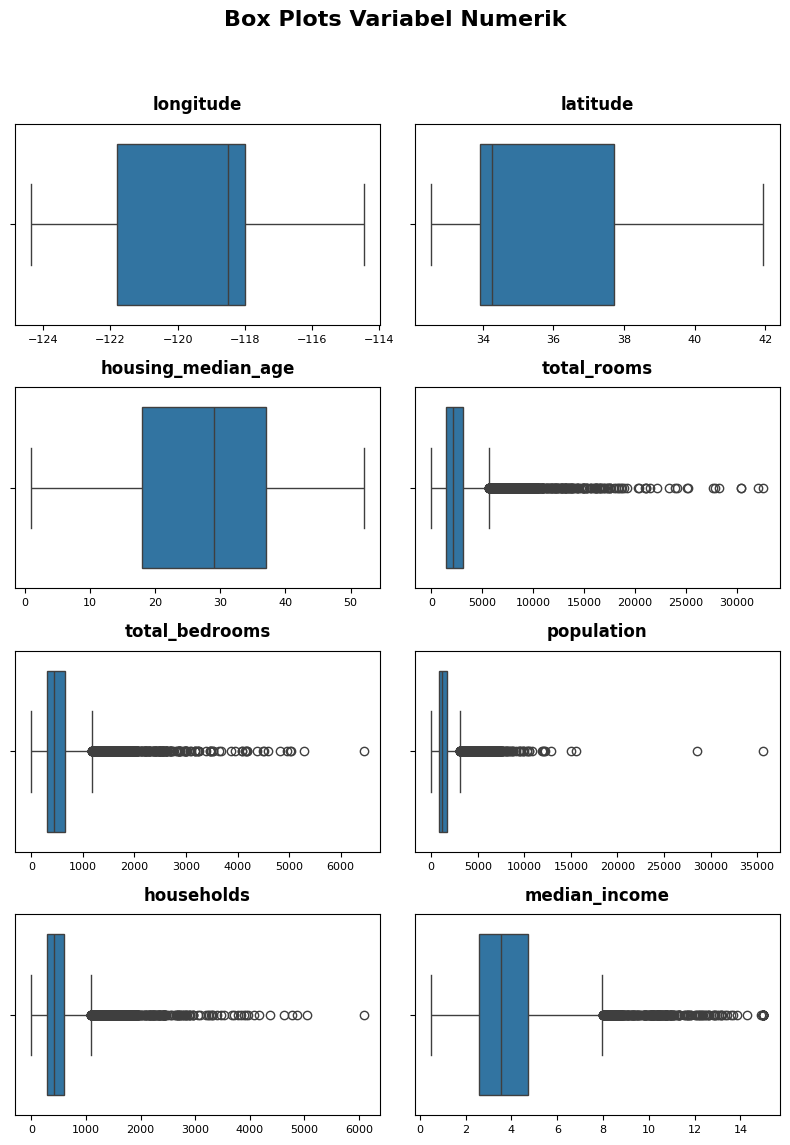

In [177]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the list of numeric columns
column_numeric = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
                  'total_bedrooms', 'population', 'households', 'median_income']

# Create subplots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(8, 12))
axes = axes.flatten()

# Loop to create boxplot for each numeric column
for i, col in enumerate(column_numeric):
    sns.boxplot(data=train, x=col, ax=axes[i])
    axes[i].set_title(f'{col}', pad=10, fontweight='bold', fontsize=12)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', labelsize=8)

# Remove any extra axes
for ax in axes[len(column_numeric):]:
    fig.delaxes(ax)

# Add a main title to the entire plot
fig.suptitle('Box Plots Variabel Numerik', fontsize=16, fontweight='bold')

# Adjust the layout of the plots
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [178]:
train[train['median_house_value']>475000]['median_house_value'].value_counts().head()

median_house_value
500001.0    543
500000.0     13
483300.0      5
480800.0      2
485000.0      2
Name: count, dtype: int64

Pada aspek median_house_value dapat dilihat bahwa terdapat 543 data yang memiliki value 500001. Secara awam, hal ini cukup aneh mengingat value yang lain tidak memiliki jumlah data sebanyak itu. Hal ini dapat dikarenakan pada saat melakukan sensus, pelaku sensus mengelompokkan rumah-rumah dengan harga diatas 500000 ke dalam satu kategori sehingga hanya direpresentasikan oleh value 500001. Dalam hal ini, value tersebut akan dihapus untuk meminimalisir adanya bias dalam analisis.

C:\Users\ASUS\AppData\Local\Temp\ipykernel_1248\3682161713.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['median_house_value'])


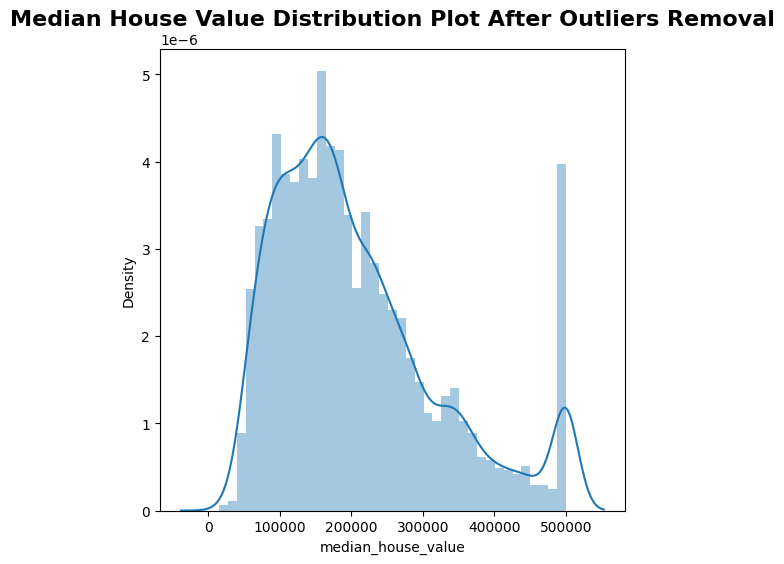

In [179]:
train = train.drop(train[train['median_house_value']==500000.0].index)  
plt.figure(figsize=(6, 6))
sns.distplot(train['median_house_value'])
plt.title('Median House Value Distribution Plot After Outliers Removal', size=16, weight='bold');

In [180]:
pd.DataFrame(train['housing_median_age'].describe())

housing_median_age
count        11545.000000
mean            28.621395
std             12.594563
min              1.000000
25%             18.000000
50%             29.000000
75%             37.000000
max             52.000000

In [181]:
train[train['housing_median_age']>=45]['housing_median_age'].value_counts().head()

housing_median_age
52.0    705
45.0    157
46.0    141
47.0    110
50.0     84
Name: count, dtype: int64



Selanjutnya, kita akan mencari outliers di kolom housing median age dengan metode yang kurang lebih sama seperti di atas.


C:\Users\ASUS\AppData\Local\Temp\ipykernel_1248\281379075.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['housing_median_age'], bins=80)


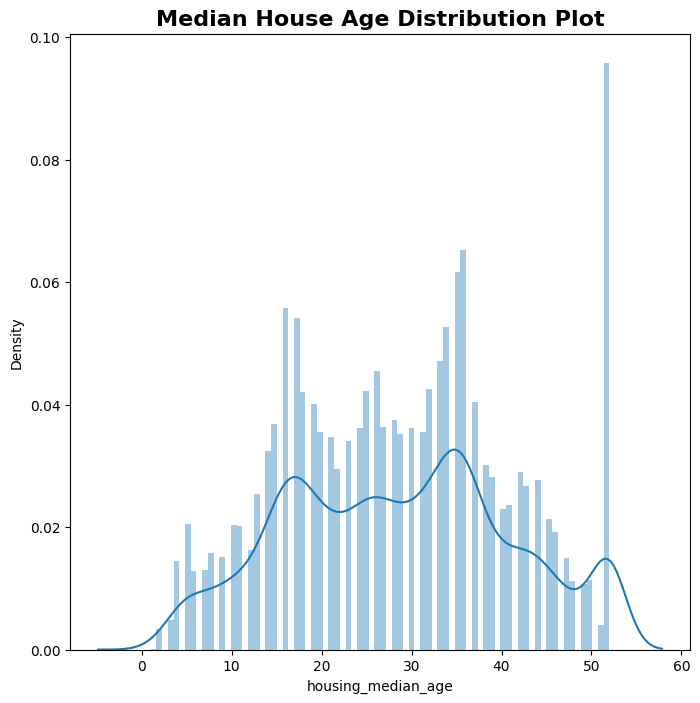

In [182]:
plt.figure(figsize=(8, 8))
sns.distplot(train['housing_median_age'], bins=80)
plt.title('Median House Age Distribution Plot', size=16, weight='bold');

In [183]:
train[train['housing_median_age']>=40]['housing_median_age'].value_counts().head()

housing_median_age
52.0    705
42.0    213
44.0    204
43.0    196
41.0    174
Name: count, dtype: int64

Median House Age dengan value 52 years memiliki density yang sangat tinggi seperti telah digambarkan pada distplot. Walaupun dapat dispekulasikan bahwa data tersebut ada pada titik lokasi atau koordinat old neighborhood establishment atau lingkungan yang sudah ada cukup lama, ditakutkan data-data tersebut dapat mempengaruhi analisa sehingga values dari housing median age yang sama dengan 52 tahun akan di-remove.

C:\Users\ASUS\AppData\Local\Temp\ipykernel_1248\3673118003.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['housing_median_age'], bins=80)


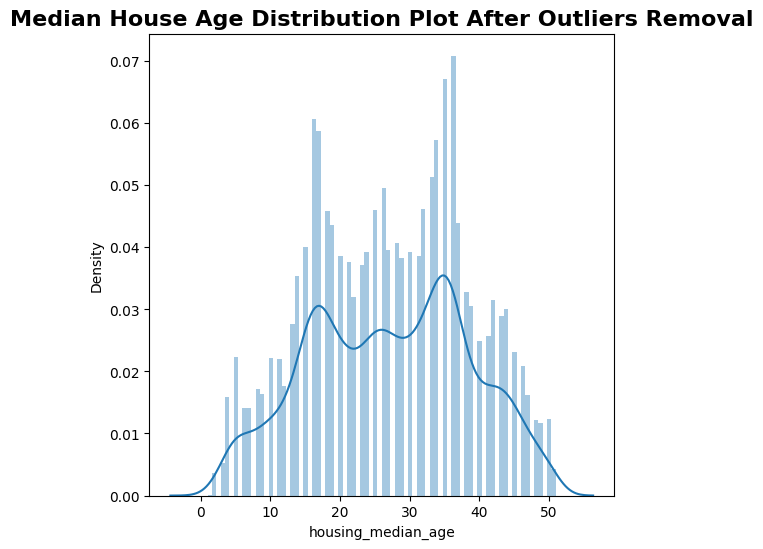

In [184]:
train = train.drop(train[train['housing_median_age']==52.0].index)  
plt.figure(figsize=(6, 6))
sns.distplot(train['housing_median_age'], bins=80)
plt.title('Median House Age Distribution Plot After Outliers Removal', size=16, weight='bold');

extreme outlier yang ada pada feature housing median age adalah housing median age yang bernilai 52. terlihat ada 896 data yang bernilai 52. jika dilihat dengan distribution plot jelas sekali terlihat mencolok dibandingkan data yg lain. outlier extreme ini akan kita hilangkan agar tidak terjadi bias sama pemodelan nanti

### <center>**Exploration Data Analysis**

Sebagai visualisasi dasar terkait data yang ada, dapat digunakan scatter plot untuk melihat penyebaran titik koordinat dengan menggunakan kolom longitude dan latitude. Alpha feature pada grafik pertama digunakan untuk menunjukkan kepadatan jumlah properti yang ada pada data. Pada grafik kedua, digunakan warna pastel untuk membedakan kategori rumah berdasarkan kolom Ocean Proximity. Hasil scatter plot identik dengan peta negara bagian California dapat dilihat sebagai berikut:

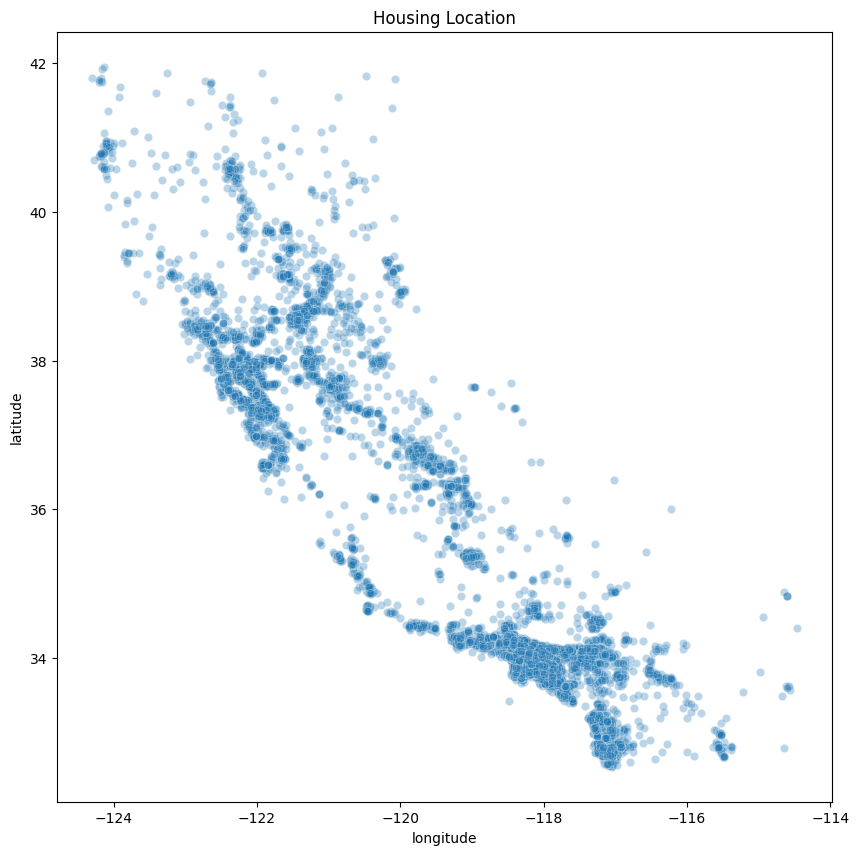

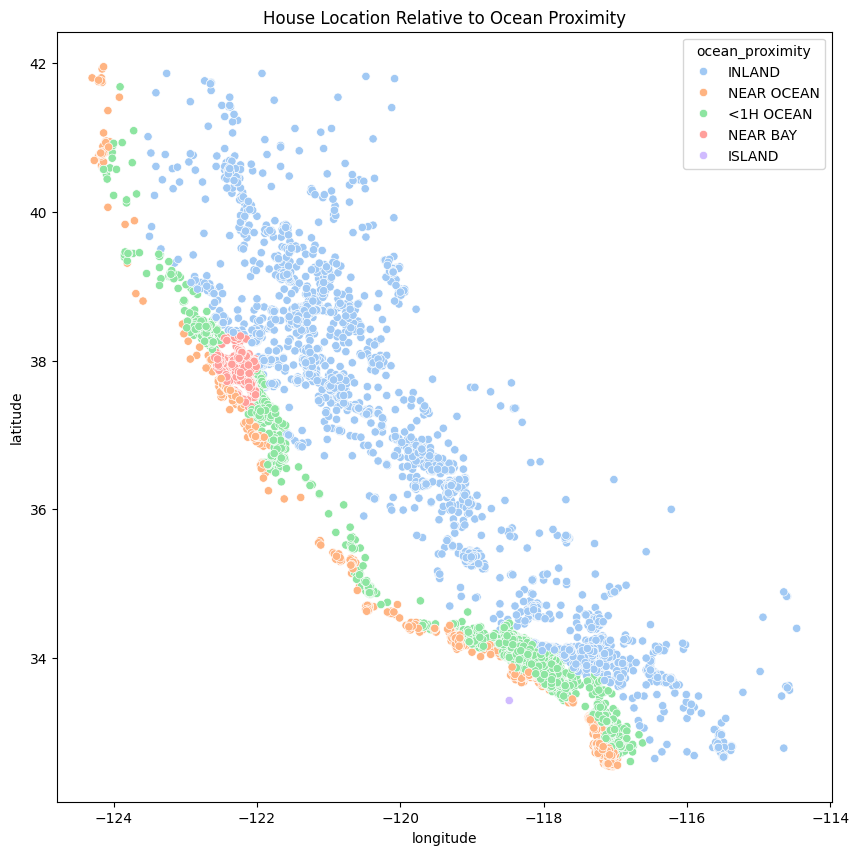

In [185]:
# Plot housing location without color coding by ocean proximity
plt.figure(figsize=(10, 10))
sns.scatterplot(x='longitude', y='latitude', data=train, alpha=0.3).set_title('Housing Location')

# Plot housing location color coded by ocean proximity
plt.figure(figsize=(10, 10))
sns.scatterplot(x='longitude', y='latitude', hue='ocean_proximity', palette='pastel', data=train).set_title('House Location Relative to Ocean Proximity')

plt.show()

In [186]:
train.groupby('ocean_proximity').max().sort_values('median_house_value', ascending = False)

longitude  latitude  housing_median_age  total_rooms  \
ocean_proximity                                                         
<1H OCEAN          -116.62     41.68                51.0      32627.0   
INLAND             -114.47     41.86                51.0      27870.0   
NEAR BAY           -122.01     38.34                51.0      18634.0   
NEAR OCEAN         -116.97     41.95                51.0      30405.0   
ISLAND             -118.48     33.43                29.0        716.0   

                 total_bedrooms  population  households  median_income  \
ocean_proximity                                                          
<1H OCEAN                6445.0     35682.0      6082.0        15.0001   
INLAND                   5027.0     11935.0      4855.0        13.1499   
NEAR BAY                 3226.0      8117.0      3052.0        12.1387   
NEAR OCEAN               4585.0     12873.0      4176.0        15.0001   
ISLAND                    214.0       422.0       173.0         2.6042   

                 median_house_value  
ocean_proximity                      
<1H OCEAN                  500001.0  
INLAND                     500001.0  
NEAR BAY                   500001.0  
NEAR OCEAN                 500001.0  
ISLAND                     287500.0

Dari 2 plot di atas dapat di simpulkan bahwa :
1. Harga rumah sangat terpengaruh oleh lokasi dan kepadatan penduduknya
1. Tidak semua rumah yang berlokasi dekat dengan laut memiliki harga yang tinggi

Terlihat bahwa tidak semua rumah yang lokasinya dekat dengan laut memiliki harga yang tinggi dan tidak semua rumah yang lokasinya jauh memiliki harga yang relatif rendah

### Data Correlation

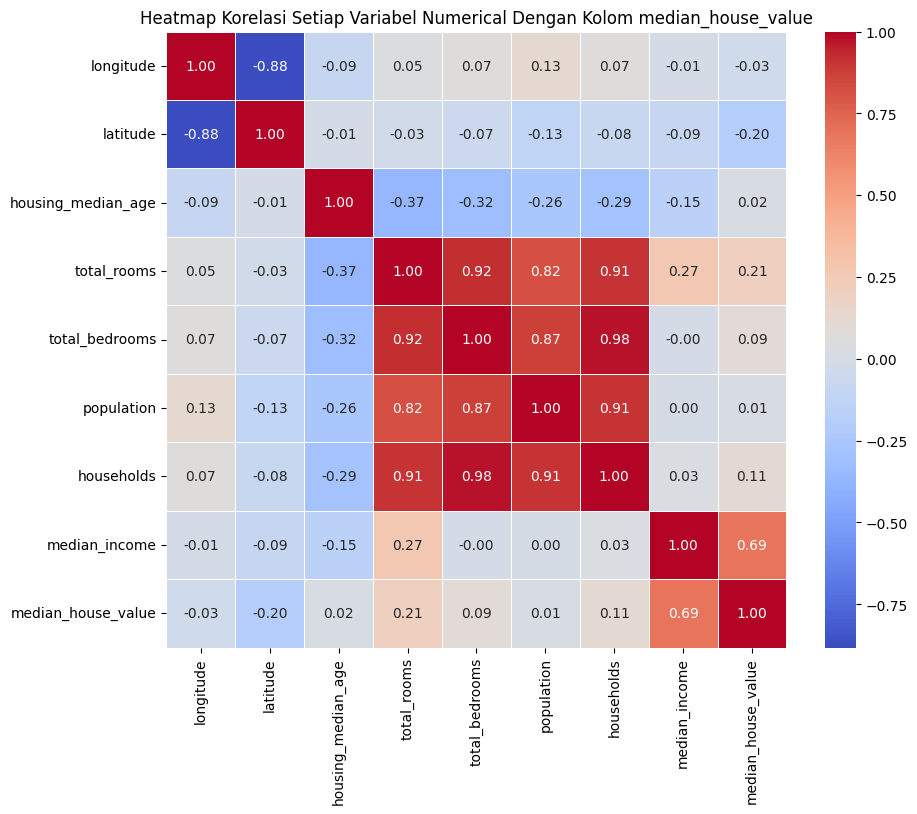

In [187]:
numerical_columns = train.columns[df.columns != 'ocean_proximity']
# Mendapatkan korelasi antar variabel
correlation_matrix = train[numerical_columns].corr('spearman')

# Membuat heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap Korelasi Setiap Variabel Numerical Dengan Kolom median_house_value')
plt.show()

Koefisien korelasi berkisar antara -1 sampai 1. Bila mendekati 1 berarti terdapat korelasi positif yang kuat; misalnya, median house value cenderung naik ketika median income naik.

Ketika koefisien mendekati -1, berarti ada korelasi negatif yang kuat. Kita dapat melihat korelasi negatif kecil antara garis latitude dan median house value (yaitu, harga memiliki sedikit kecenderungan untuk turun saat perumahan berada di utara).

Terakhir, koefisien mendekati nol berarti tidak ada korelasi linier.


Text(0.5, 1.0, 'Pair Plot antar Feature')

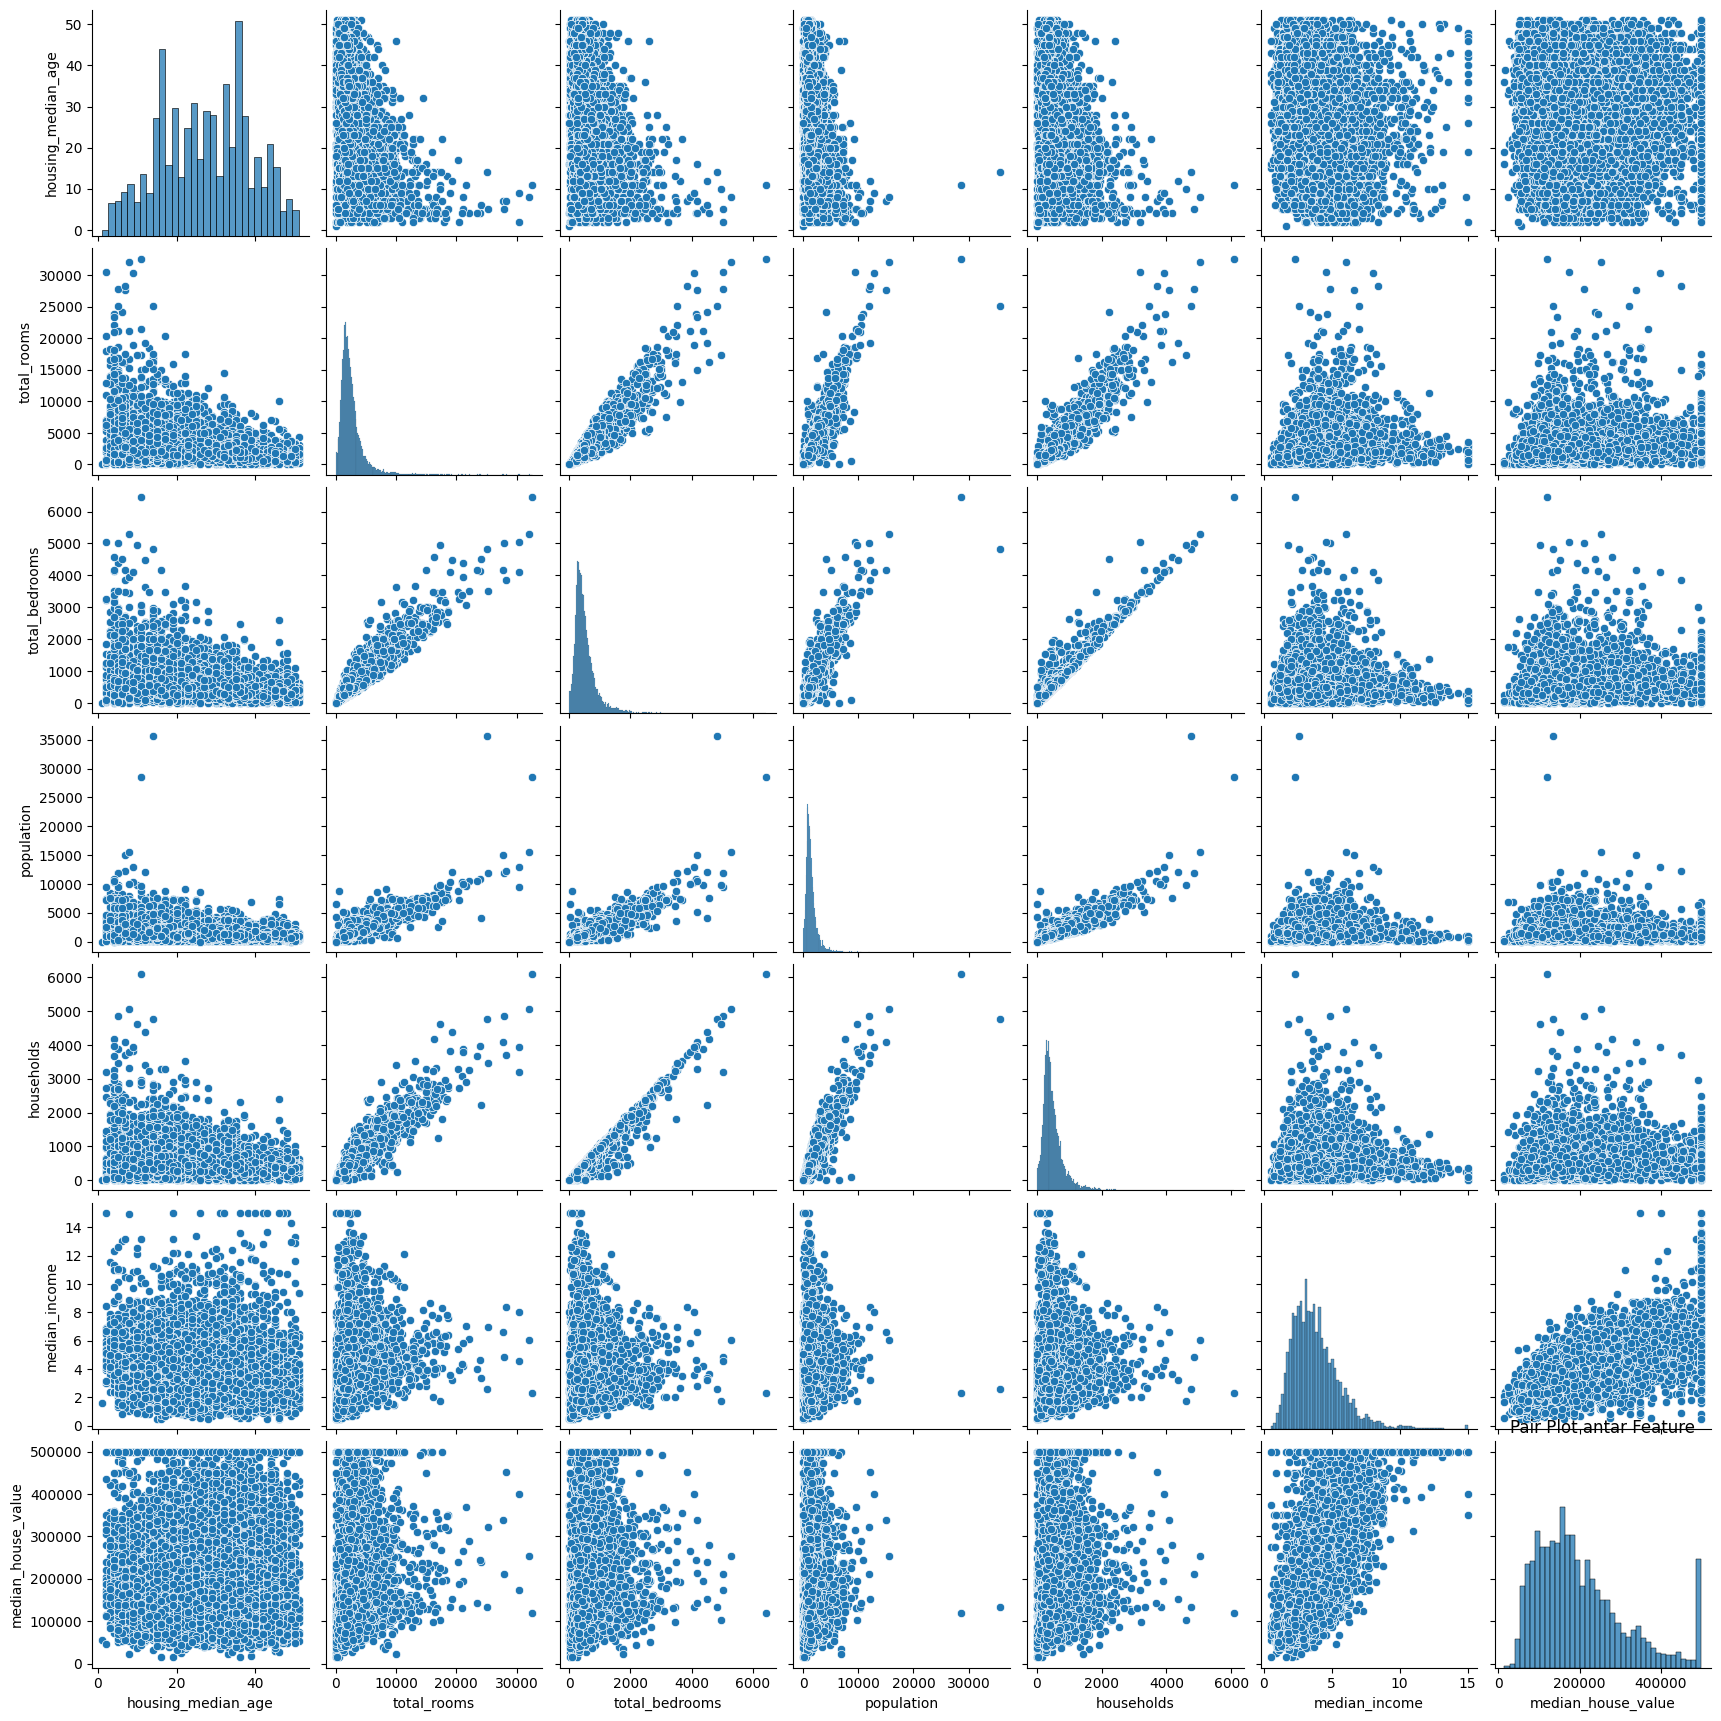

In [188]:
sns.pairplot(train[['housing_median_age','total_rooms','total_bedrooms','population','households','median_income','median_house_value']])
plt.title('Pair Plot antar Feature')

Dari plot correlation matrix di atas terlihat bahwa hanya feature ```median_income``` saja yang memiliki nilai korelasi yang cukup tinggi terhadap feature ```median_house_value```. dimana korelasinya adalah positif dimana tiap kenaikan ```median_income``` semakin meningkat pula niali ```median_house_value``` atau semakin tinggi pendapatan penduduk akan semakin tinggi harga rumah di daerah tersebut.

### Data abnormal

Dalam contoh kasus ini setelah di telaah lebih jauh 1-1 nya case yang dapat menimbulkan data abnormality terjadi adalah jika total bedrooms lebih banyak dari total rooms, secara logika total rooms pada properti meliput semua ruangan yang ada termasuk bathroom, storage, attic, dan lain-lain, sedangkan bedrooms adalah bagian dari total rooms.

In [189]:
# Pengecekan apakah ada data dari total_rooms yang lebih besar dari total_bedrooms
pd.DataFrame(train[train['total_rooms']<train['total_bedrooms']].value_counts())

Empty DataFrame
Columns: [count]
Index: []

### <center>**Data Prepocessing**

In [190]:
cols=['ocean_proximity']
for i in cols:
    print(i)
    print(pd.concat([X_train,y_train],axis=1).groupby(i)['median_house_value'].mean().reset_index().sort_values(by='median_house_value')[i].unique())
    display(pd.concat([X_train,y_train],axis=1).groupby(i)['median_house_value'].mean().reset_index().sort_values(by='median_house_value'))

ocean_proximity
['INLAND' '<1H OCEAN' 'NEAR OCEAN' 'NEAR BAY' 'ISLAND']


ocean_proximity  median_house_value
1          INLAND       125209.805586
0       <1H OCEAN       239560.969496
4      NEAR OCEAN       249838.495710
3        NEAR BAY       258588.949804
2          ISLAND       351100.000000

## Final Feature

In [191]:
fitur=['latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms',
       'population', 'households', 'median_income', 'ocean_proximity']

X_train=X_train[fitur]
X_test=X_test[fitur]

In [192]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11558 entries, 1320 to 7816
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   latitude            11558 non-null  float64
 1   housing_median_age  11558 non-null  float64
 2   total_rooms         11558 non-null  float64
 3   total_bedrooms      11450 non-null  float64
 4   population          11558 non-null  float64
 5   households          11558 non-null  float64
 6   median_income       11558 non-null  float64
 7   ocean_proximity     11558 non-null  object 
dtypes: float64(7), object(1)
memory usage: 1.0+ MB


In [193]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.compose import ColumnTransformer
# Define preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('Numerical', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', RobustScaler())
        ]), [ 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms',
       'population', 'households', 'median_income']),
        
        ('Categorical 2', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('encoder', OrdinalEncoder())
        ]), ['ocean_proximity'])
    ],remainder='passthrough'
)

# Define pipeline without classifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('feature_selection', SelectKBest(score_func=f_regression)),
    ('regressor', RandomForestRegressor())  # Placeholder for regressor
])

param_grid = [
        {
        'feature_selection__k': [5,15],  # Ubah nilai k dari 1 hingga 20
        'regressor': [RandomForestRegressor()],
        'regressor__n_estimators': [50, 100, 200],
        'regressor__max_depth': [None, 10, 20],
        'regressor__min_samples_split': [2, 5],
        'regressor__min_samples_leaf': [1,  4]
    },
    {
        'feature_selection__k': [5,15],  # Ubah nilai k dari 1 hingga 20
        'regressor': [DecisionTreeRegressor()],
        'regressor__max_depth': [None, 10, 20],
        'regressor__min_samples_split': [2, 5],
        'regressor__min_samples_leaf': [1,  4]
    },
    {
        'feature_selection__k': [5,15],  # Ubah nilai k dari 1 hingga 20
        'regressor': [LinearRegression()]
    },
    {
        'feature_selection__k': [5,15],  # Ubah nilai k dari 1 hingga 20
        'regressor': [XGBRegressor()],
        'regressor__n_estimators': [50, 100, 200],
        'regressor__max_depth': [None, 10, 20],
        'regressor__learning_rate': [0.01, 0.1],
        'regressor__subsample': [0.6, 0.8]
    }
]

# Buat GridSearchCV dengan pipeline
gscv = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, scoring='neg_mean_absolute_error')

# Fit GridSearchCV to the data
gscv.fit(X_train, y_train)


In [ ]:
gscv.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['latitude',
                                                   'housing_median_age',
                                                   'total_rooms',
                                                   'total_bedrooms',
                                                   'population', 'households',
                                                   'median_income']),
                                                 ('Categorical 2',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='mo...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.1,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=200, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

#### GET FEATURE IMPORTANCE NAMES OUT

In [ ]:
# Extract the SelectKBest step
select_k_best = gscv.best_estimator_.named_steps['feature_selection']

# Extract the column transformer step
column_transformer = gscv.best_estimator_.named_steps['preprocessor']

# Get the feature names after one-hot encoding
num1_feature_names= column_transformer.named_transformers_['Numerical'].get_feature_names_out(['latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms',
       'population', 'households', 'median_income'])

ohe_feature_names= column_transformer.named_transformers_['Categorical 2'].get_feature_names_out(['ocean_proximity'])

feat_cols=list(num1_feature_names)+list(ohe_feature_names)
# +list(ord1_feature_names)+list(ord2_feature_names)

# select_k_best.get_feature_names_out(feat_cols)

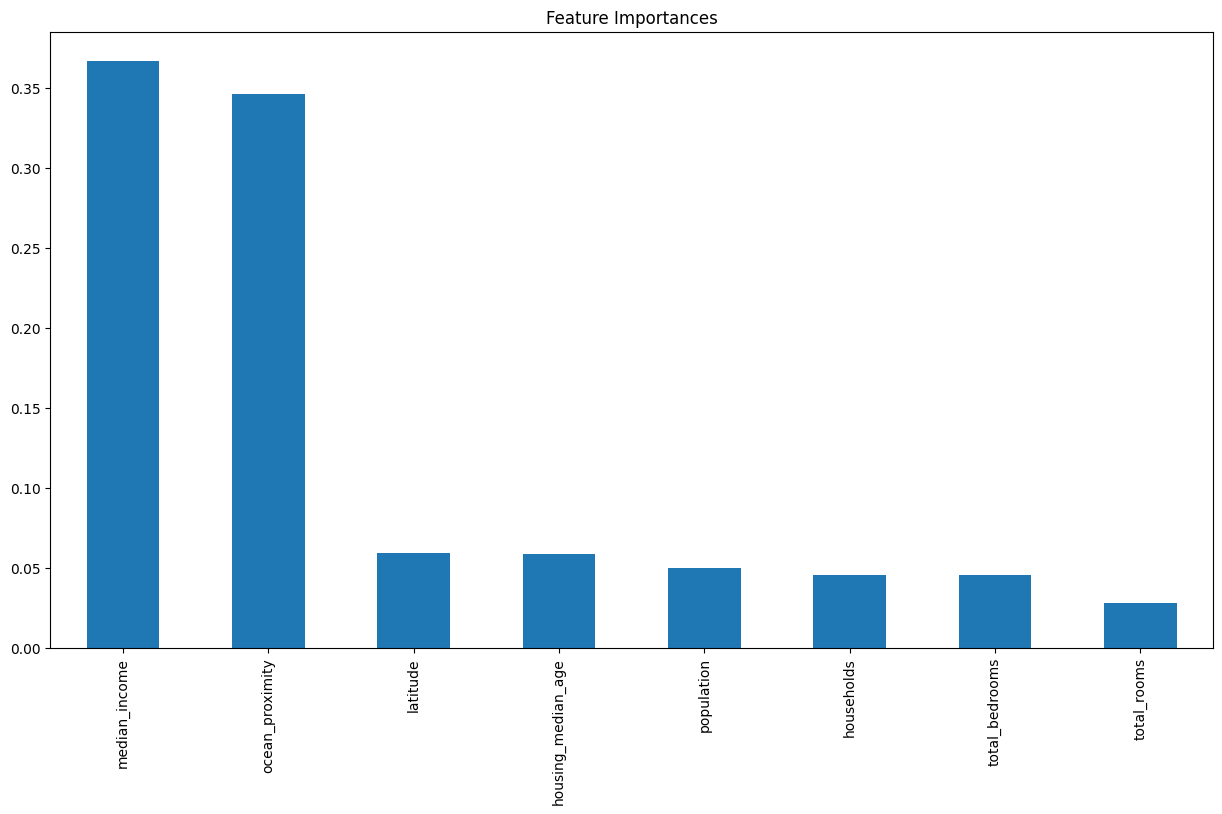

In [ ]:
# Get feature importance from the best model
best_model = gscv.best_estimator_.named_steps['regressor']


feature_names = gscv.best_estimator_.named_steps['feature_selection'].get_support(indices=True)
selected_feature_names = np.array(feat_cols)[feature_names]


model_coef1 = pd.Series(best_model.feature_importances_, selected_feature_names).sort_values(ascending = False)
plt.figure(figsize=(15,8))
model_coef1.iloc[:50].plot(kind='bar', title='Feature Importances')
plt.show()

100%|===================| 11516/11558 [01:37<00:00]        

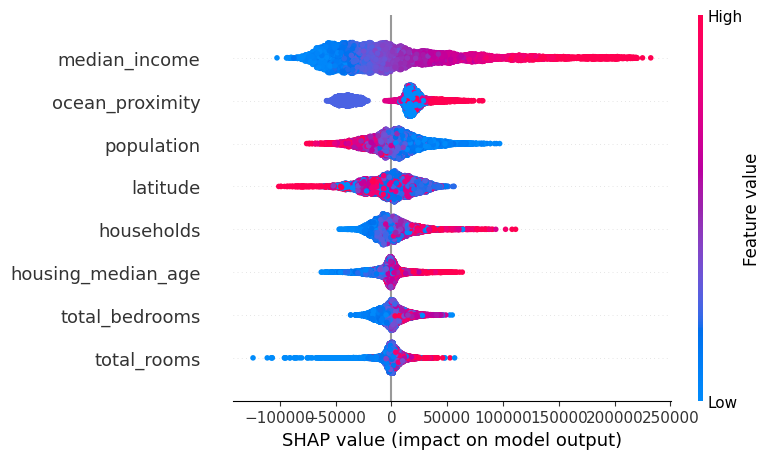

In [ ]:
import shap

# Apply preprocessing to the training data
X_train_preprocessed = gscv.best_estimator_.named_steps['preprocessor'].transform(X_train)

# Apply feature selection to the preprocessed data
X_train_selected = gscv.best_estimator_.named_steps['feature_selection'].transform(X_train_preprocessed)

# Get the feature names after selection
feature_names = gscv.best_estimator_.named_steps['feature_selection'].get_support(indices=True)
selected_feature_names = np.array(feat_cols)[feature_names]

# Get feature importance from the best model
best_model = gscv.best_estimator_.named_steps['regressor']


# Generate SHAP values
explainer = shap.Explainer(best_model, X_train_selected)
shap_values = explainer(X_train_selected)

# Plot SHAP summary plot
shap.summary_plot(shap_values, X_train_selected, feature_names=selected_feature_names)

### Prepocessing data test

#### handling outlier

In [ ]:
test[test['median_house_value']>475000]['median_house_value'].value_counts().head()

median_house_value
500000.0    4
483700.0    1
493200.0    1
489800.0    1
495500.0    1
Name: count, dtype: int64

C:\Users\ASUS\AppData\Local\Temp\ipykernel_1248\1962287851.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test['median_house_value'])


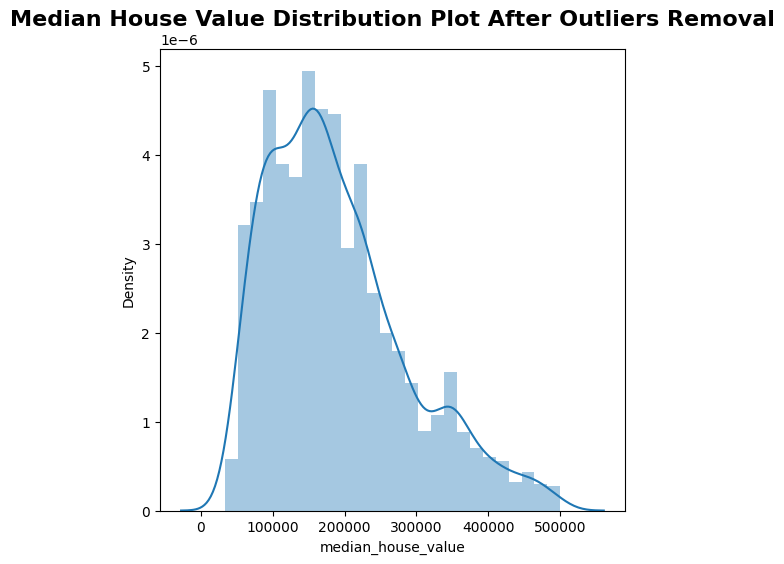

In [ ]:
test = test.drop(test[test['median_house_value']==500001.0].index)  
plt.figure(figsize=(6, 6))
sns.distplot(test['median_house_value'])
plt.title('Median House Value Distribution Plot After Outliers Removal', size=16, weight='bold');

C:\Users\ASUS\AppData\Local\Temp\ipykernel_1248\1915960553.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test['housing_median_age'], bins=80)


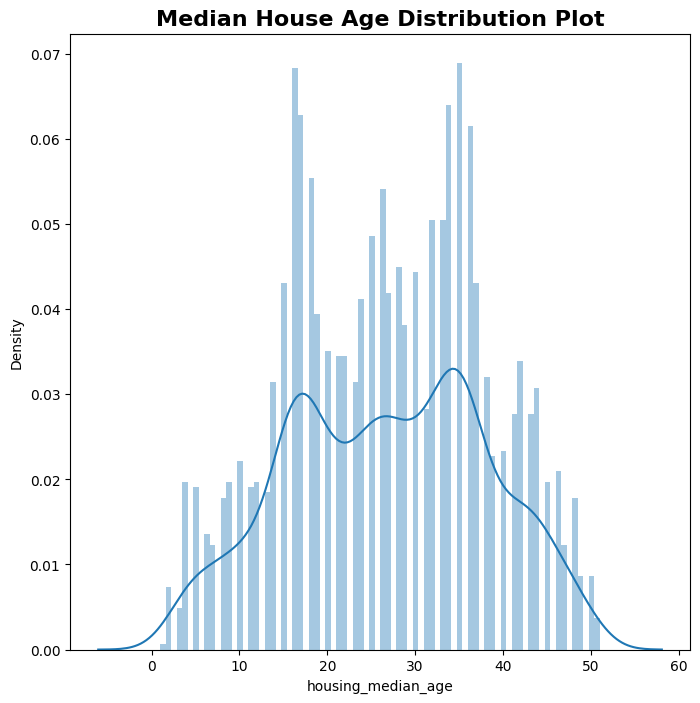

In [ ]:
plt.figure(figsize=(8, 8))
sns.distplot(test['housing_median_age'], bins=80)
plt.title('Median House Age Distribution Plot', size=16, weight='bold');

C:\Users\ASUS\AppData\Local\Temp\ipykernel_1248\91680614.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test['housing_median_age'], bins=80)


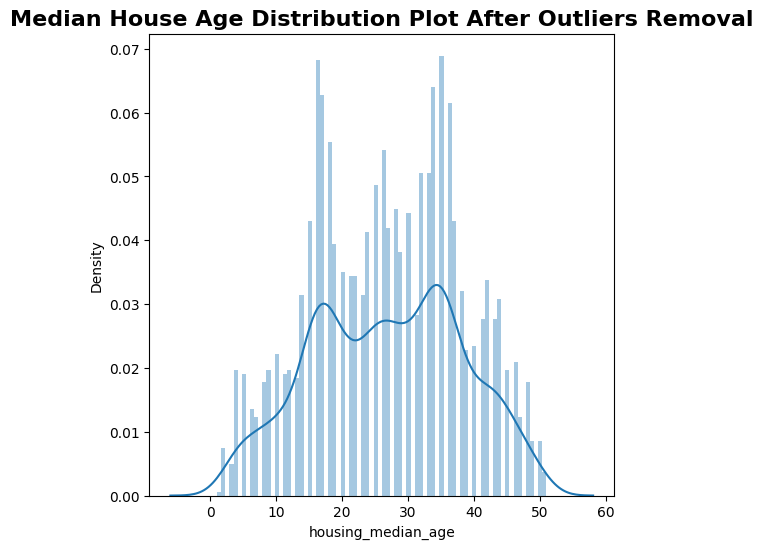

In [ ]:
test = test.drop(test[test['housing_median_age']==52.0].index)  
plt.figure(figsize=(6, 6))
sns.distplot(test['housing_median_age'], bins=80)
plt.title('Median House Age Distribution Plot After Outliers Removal', size=16, weight='bold');

In [ ]:
y_pred=gscv.best_estimator_.predict(X_test)

In [ ]:
print('MSE',mean_squared_error(y_test, y_pred))
print('MAE',mean_absolute_error(y_test, y_pred))
print('RMSE',mean_squared_error(y_test, y_pred)**(0.5))

MSE 1871019664.5399065
MAE 28888.783985726644
RMSE 43255.28481630778


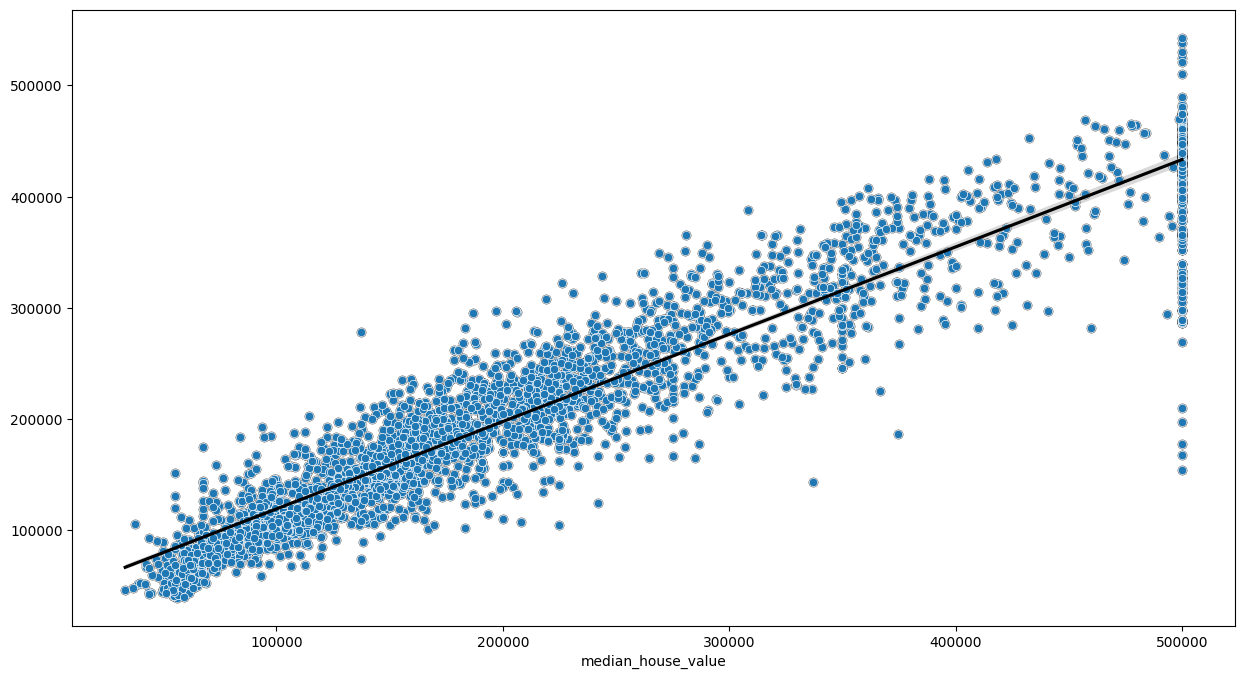

In [ ]:
plt.figure(figsize=(15,8))
sns.regplot(x=y_test,y=y_pred,color='black')
sns.scatterplot(x=y_test,y=y_pred)
plt.show()

### Handle Prize Outlier

In [ ]:
y_train.shape

(11558, 1)

In [ ]:
y_test[y_test['median_house_value']==500000]

median_house_value
2876             500000.0
12388            500000.0
10450            500000.0
8569             500000.0
2236             500000.0

In [ ]:
# Filter y_train untuk menemukan baris dengan median_house_value sebesar 500000
indices_with_500000 = y_test[y_test['median_house_value'] == 500000].index

# Menampilkan indeks-indeks tersebut
print(indices_with_500000)

Index([2876, 12388, 10450, 8569, 2236], dtype='int64')


In [ ]:
y_train=pd.DataFrame(y_train)
y_test=pd.DataFrame(y_test)
# Drop baris dari X_train dan X_test
X_train_out = X_train.drop([12956, 9906, 4064, 4082, 5112, 4786, 2653, 1846, 370, 7647, 3270, 10688, 7287], axis=0)
X_test_out = X_test.drop([2876, 12388, 10450, 8569, 2236], axis=0)

# Filter y_train dan y_test
y_train_out = y_train[y_train['median_house_value'] < 500000]
y_test_out = y_test[y_test['median_house_value'] < 500000]

# Pastikan indeks dari X_train_out dan y_train_out sinkron
common_indices_train = X_train_out.index.intersection(y_train_out.index)
X_train_out = X_train_out.loc[common_indices_train]
y_train_out = y_train_out.loc[common_indices_train]


# Pastikan indeks dari X_test_out dan y_test_out sinkron
common_indices_test = X_test_out.index.intersection(y_test_out.index)
X_test_out = X_test_out.loc[common_indices_test]
y_test_out = y_test_out.loc[common_indices_test]


# Fit model
model = gscv.best_estimator_
model.fit(X_train_out, y_train_out)

# Predict
y_pred = model.predict(X_test_out)

C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=15 is greater than n_features=9. All the features will be returned.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print('MSE',mean_squared_error(y_test_out, y_pred))
print('MAE',mean_absolute_error(y_test_out, y_pred))
print('RMSE',mean_squared_error(y_test_out, y_pred)**(0.5))


MSE 1752848880.074272
MAE 28732.089163352273
RMSE 41867.03810964267


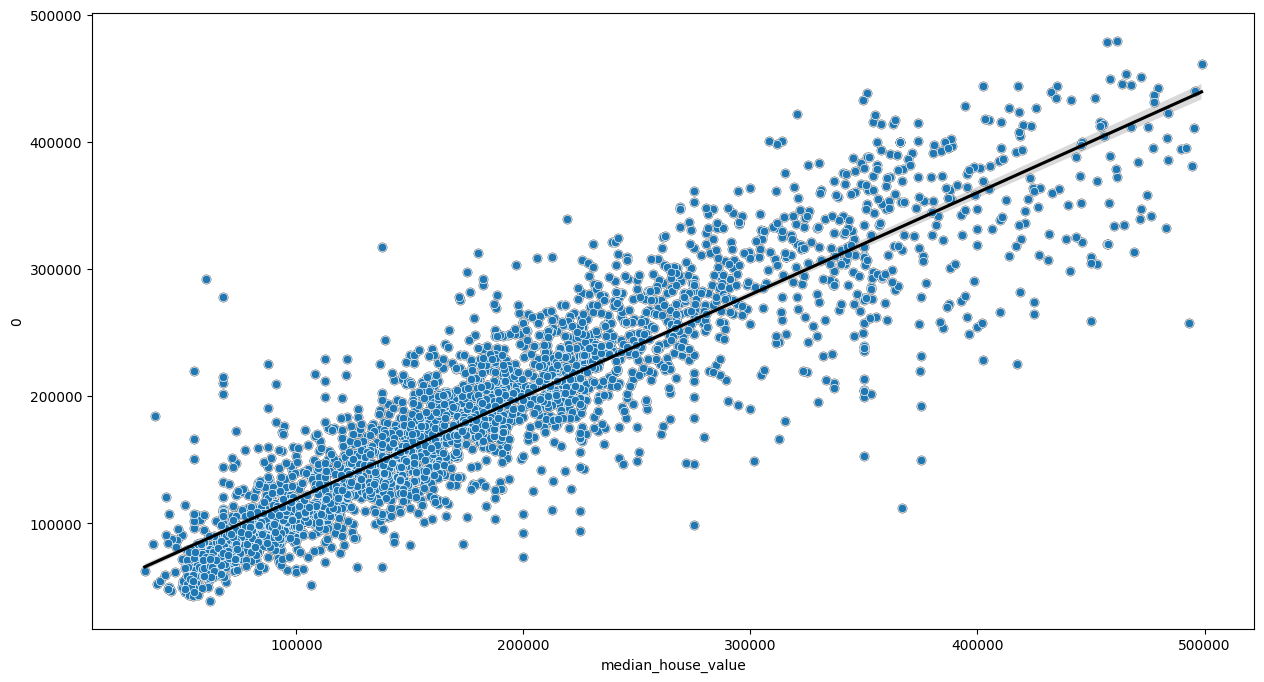

In [ ]:
y_test_out=y_test_out.reset_index(drop=True)
y_pred=pd.DataFrame(y_pred)
df_gab=pd.concat([y_test_out,y_pred],axis=1)
plt.figure(figsize=(15,8))
sns.regplot(x=y_test_out,y=y_pred,color='black')
sns.scatterplot(x='median_house_value',y=0,data=df_gab)
plt.show()

> ## 3.4. FIT MODEL TO ALL DATA

handling outlier

In [ ]:
df[df['median_house_value']>475000]['median_house_value'].value_counts().head()

median_house_value
500001.0    678
500000.0     18
483300.0      6
492500.0      2
490800.0      2
Name: count, dtype: int64

C:\Users\ASUS\AppData\Local\Temp\ipykernel_1248\2050917291.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['median_house_value'])


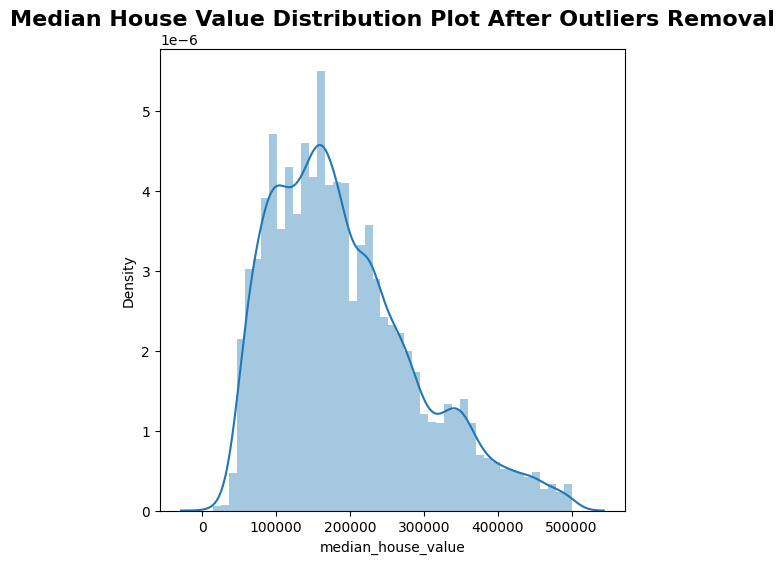

In [ ]:
df = df.drop(df[df['median_house_value']==500001.0].index)  
plt.figure(figsize=(6, 6))
sns.distplot(df['median_house_value'])
plt.title('Median House Value Distribution Plot After Outliers Removal', size=16, weight='bold');

C:\Users\ASUS\AppData\Local\Temp\ipykernel_1248\3711953546.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['housing_median_age'], bins=80)


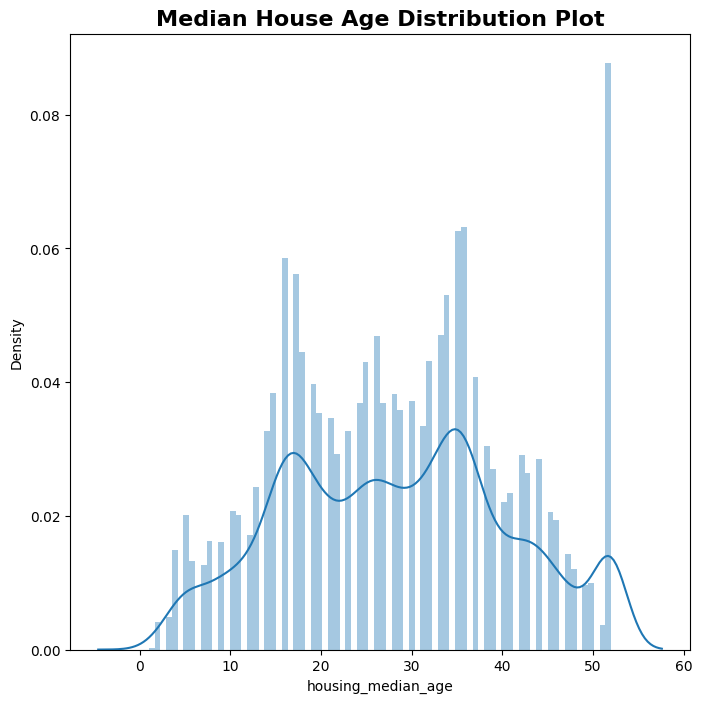

In [ ]:
plt.figure(figsize=(8, 8))
sns.distplot(df['housing_median_age'], bins=80)
plt.title('Median House Age Distribution Plot', size=16, weight='bold');

In [ ]:
X = df[['latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms',
       'population', 'households', 'median_income', 'ocean_proximity']]
y = df['median_house_value']

 #import modul
import pickle

 # fitting
gscv.best_estimator_.fit(X, y)

# save with pickle
pickle.dump(gscv.best_estimator_, open('best_model_capstone3_hilda.sav', 'wb'))

C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=15 is greater than n_features=8. All the features will be returned.
  warnings.warn(


## Rule Based 

In [ ]:
df['total_rooms_bin']=pd.qcut(df['total_rooms'],3,labels=['Less', 'Enough', 'Lots'])
df['total_bedrooms_bin']=pd.qcut(df['total_bedrooms'],3,labels=['Less', 'Enough', 'Lots'])
df['population_bin']=pd.qcut(df['population'],3,labels=['Quiet', 'Normal', 'Crowded'])
df['households_bin']=pd.qcut(df['households'],3,labels=['Quiet', 'Normal', 'Crowded'])


df1=df.groupby(['housing_median_age','median_income','total_rooms_bin','total_bedrooms_bin','population_bin','households_bin'])['median_house_value'].mean().reset_index()
df1.columns=['housing_median_age','median_income','total_rooms_bin','total_bedrooms_bin','population_bin','households_bin','flag_price']
df1

C:\Users\ASUS\AppData\Local\Temp\ipykernel_1248\2841933248.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df1=df.groupby(['housing_median_age','median_income','total_rooms_bin','total_bedrooms_bin','population_bin','households_bin'])['median_house_value'].mean().reset_index()


housing_median_age  median_income total_rooms_bin  \
0                        1.0         0.4999            Less   
1                        1.0         0.4999            Less   
2                        1.0         0.4999            Less   
3                        1.0         0.4999            Less   
4                        1.0         0.4999            Less   
...                      ...            ...             ...   
38990479                52.0        15.0001            Lots   
38990480                52.0        15.0001            Lots   
38990481                52.0        15.0001            Lots   
38990482                52.0        15.0001            Lots   
38990483                52.0        15.0001            Lots   

         total_bedrooms_bin population_bin households_bin  flag_price  
0                      Less          Quiet          Quiet         NaN  
1                      Less          Quiet         Normal         NaN  
2                      Less          Quiet        Crowded         NaN  
3                      Less         Normal          Quiet         NaN  
4                      Less         Normal         Normal         NaN  
...                     ...            ...            ...         ...  
38990479               Lots         Normal         Normal         NaN  
38990480               Lots         Normal        Crowded         NaN  
38990481               Lots        Crowded          Quiet         NaN  
38990482               Lots        Crowded         Normal         NaN  
38990483               Lots        Crowded        Crowded         NaN  

[38990484 rows x 7 columns]

### Splitting Data

In [ ]:
df2=pd.merge(df,df1, how='left',on=['housing_median_age','median_income','total_rooms_bin','total_bedrooms_bin','population_bin','households_bin'])
df2.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -119.79     36.73                52.0        112.0            28.0   
1    -122.21     37.77                43.0       1017.0           328.0   
2    -118.04     33.87                17.0       2358.0           396.0   
3    -118.28     34.06                17.0       2518.0          1196.0   
4    -119.81     36.73                50.0        772.0           194.0   

   population  households  median_income ocean_proximity  median_house_value  \
0       193.0        40.0         1.9750          INLAND             47500.0   
1       836.0       277.0         2.2604        NEAR BAY            100000.0   
2      1387.0       364.0         6.2990       <1H OCEAN            285800.0   
3      3051.0      1000.0         1.7199       <1H OCEAN            175000.0   
4       606.0       167.0         2.2206          INLAND             59200.0   

  total_rooms_bin total_bedrooms_bin population_bin households_bin  flag_price  
0            Less               Less          Quiet          Quiet     47500.0  
1            Less               Less          Quiet          Quiet    100000.0  
2          Enough             Enough         Normal         Normal    285800.0  
3          Enough               Lots        Crowded        Crowded    175000.0  
4            Less               Less          Quiet          Quiet     59200.0

In [ ]:
df2.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value', 'total_rooms_bin',
       'total_bedrooms_bin', 'population_bin', 'households_bin', 'flag_price'],
      dtype='object')

In [ ]:
#feature
X=df2[[ 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms',
       'population', 'households', 'median_income', 'ocean_proximity','flag_price']]

y=df2['median_house_value']
X_train2, X_test2, y_train2, y_test2=train_test_split(X,y,test_size=0.3,random_state=10)


In [ ]:
y_pred=X_test2['flag_price']

In [ ]:
print('MSE',mean_squared_error(y_test2, y_pred))
print('MAE',mean_absolute_error(y_test2, y_pred))
print('RMSE',mean_squared_error(y_test2, y_pred)**(0.5))

ValueError: Input contains NaN.

## ML vs Rule Based

**`Rule Based`** :
Pada penggunaan rule based, model menghasilkan MAE sebesar `677.882` Dollar, artinya setiap prediksi yang dilakukan oleh model, punya kecendrungan meleset sebesar `677.882` Dollar. Anggaplah terdapat 100 rumah yang telah dijual, artinya kerugian yang dihasilkan jika menggunakan rulebased sebesar `100 x 677.882 = 677.88200` Dollar.


**`Machine Learning`** :
Sedangkan jika menggunakan Machine Learning, model menghasilkan MAE sebesar `37498.84` Dollar, artinya setiap prediksi yang dilakukan oleh model, punya kecendrungan meleset sebesar `872` Dollar. Jika dianggap terdapat 100 mobil yang telah dijual, artinya kerugian yang dihasilkan jika menggunakan machine learning sebesar `100 x 872 = 87200` Dollar.

Dengan menggunakan ML, bisa menekan kerugian sebesar 37% dibandingkan menggunakan Rulebased.
